In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import MonoLogitTrans
import LinearModel
import sklearn
from sklearn.linear_model import LogisticRegressionCV
import time

**This demo uses breast cancer data offered by sklearn to demonstrate how to use MonoLogitTrans.py to preform single variable transformation, as well as to use LinearModel.py to build binary classifier after that**

The main parts are:

1. Get data
2. Perform single varaible transformation with MonoLogitTrans
3. Modeling and comparision
4. Demonstrate the choice of start point of LinearModel
5. Demonstrate the choice of Q0 and Q1 of LinearModel

### Get Data

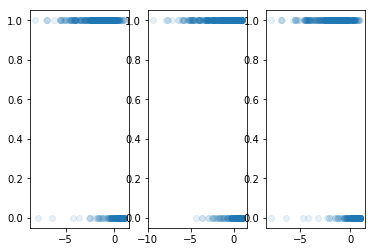

In [2]:
importlib.reload(LinearModel)
x1,x2,x3,x1_test,x2_test,x3_test,y,y_test = MonoLogitTrans.get_data()

plt.subplot(1,3,1)
plt.plot(x1,y,'o',alpha=0.1)
plt.subplot(1,3,2)
plt.plot(x2,y,'o',alpha=0.1)
plt.subplot(1,3,3)
plt.plot(x3,y,'o',alpha=0.1)
plt.show()

### Perform single varaible transformation with MonoLogitTrans

In [3]:
importlib.reload(MonoLogitTrans)
MonoLogitTrans1 = MonoLogitTrans.MonoLogitTrans(method='strict')
MonoLogitTrans2 = MonoLogitTrans.MonoLogitTrans(method='wide')
MonoLogitTrans3 = MonoLogitTrans.MonoLogitTrans(method='wide',num_hidden=30)
time1 = time.time()
MonoLogitTrans1.fit(x1,y)
MonoLogitTrans2.fit(x2,y)
MonoLogitTrans3.fit(x3,y)
time2 = time.time()
print(time2-time1)

x1_trans = MonoLogitTrans1.transform(x1_test)
x2_trans = MonoLogitTrans2.transform(x2_test)
x3_trans = MonoLogitTrans3.transform(x3_test)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
6.544736385345459


**Save and load parameters**

In [4]:
#save parameters
MonoLogitTrans1.save_parameter('./Docs/MonoLogitTrans1.txt')
MonoLogitTrans2.save_parameter('./Docs/MonoLogitTrans2.txt')
MonoLogitTrans3.save_parameter('./Docs/MonoLogitTrans3.txt')
#load parameters
MonoLogitTrans1_ = MonoLogitTrans.MonoLogitTrans()
MonoLogitTrans2_ = MonoLogitTrans.MonoLogitTrans()
MonoLogitTrans3_ = MonoLogitTrans.MonoLogitTrans()
MonoLogitTrans1_.load_parameter('./Docs/MonoLogitTrans1.txt')
MonoLogitTrans2_.load_parameter('./Docs/MonoLogitTrans2.txt')
MonoLogitTrans3_.load_parameter('./Docs/MonoLogitTrans3.txt')
x1_trans = MonoLogitTrans1_.transform(x1_test)
x2_trans = MonoLogitTrans2_.transform(x2_test)
x3_trans = MonoLogitTrans3_.transform(x3_test)

#### Make sure converge by looking at trace plot of loss

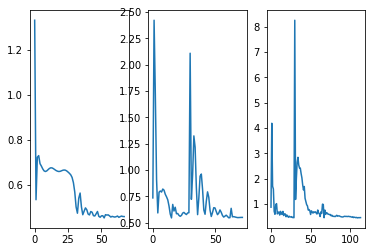

In [5]:
plt.subplot(1,3,1)
plt.plot(MonoLogitTrans1.Loss)
plt.subplot(1,3,2)
plt.plot(MonoLogitTrans2.Loss)
plt.subplot(1,3,3)
plt.plot(MonoLogitTrans3.Loss)
plt.show()

#### Comparision between original data (horizontal ordinate) and transformed data (vertical ordinate)

If method='wide', such as the last two varaibles, then the value of lambda_monotonous controls monotonicity.
The greater lambda_monotonous is, the more likely that the tranformation is monotone.

If method='strict', such as the first varaible, the tranformation would be guaranteed to be monotone.

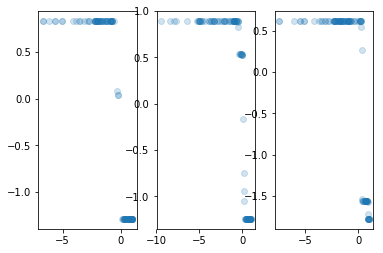

In [6]:
plt.subplot(1,3,1)
plt.plot(x1_test,x1_trans,'o',alpha=0.2)
plt.subplot(1,3,2)
plt.plot(x2_test,x2_trans,'o',alpha=0.2)
plt.subplot(1,3,3)
plt.plot(x3_test,x3_trans,'o',alpha=0.2)
plt.show()

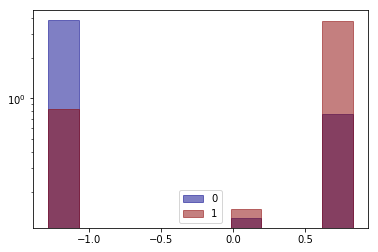

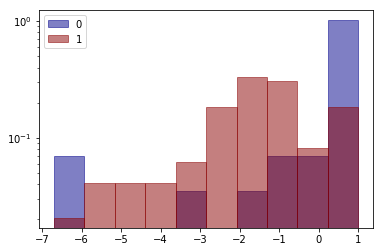

In [7]:
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x1_trans),lable_=pd.Series(y_test))
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x1_test),lable_=pd.Series(y_test))

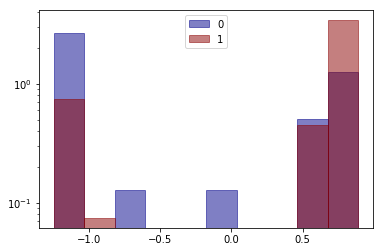

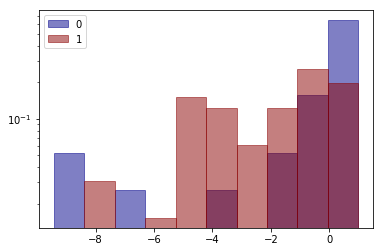

In [8]:
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x2_trans),lable_=pd.Series(y_test))
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x2_test),lable_=pd.Series(y_test))

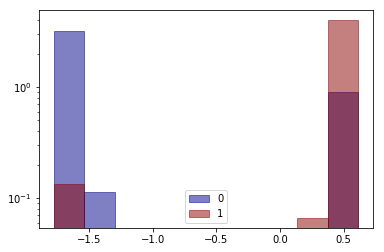

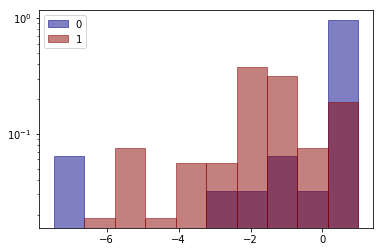

In [9]:
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x3_trans),lable_=pd.Series(y_test))
MonoLogitTrans.PlotComparableHistogram(variable_=pd.Series(x3_test),lable_=pd.Series(y_test))

#### Obtain the test set of original data and transformed data

In [10]:
x1_test = np.reshape(x1_test,(len(x1_test),1))
x2_test = np.reshape(x2_test,(len(x2_test),1))
x3_test = np.reshape(x3_test,(len(x3_test),1))
x1_trans = np.reshape(x1_trans,(len(x1_trans),1))
x2_trans = np.reshape(x2_trans,(len(x2_trans),1))
x3_trans = np.reshape(x3_trans,(len(x3_trans),1))

X_origin = np.concatenate((x1_test,x2_test,x3_test),axis=1)
X_trans = np.concatenate((x1_trans,x2_trans,x3_trans),axis=1)

### Modeling and comparision

Because all the transformed variables are positively correlated with P(y=1), it would be better to use PosLassoClassifierCV of LinearModel. 

For the original data, LogisticRegressionCV of sklearn is applied.

In [11]:
model1 = LinearModel.PosLassoClassifierCV(beta_mean=True,start_point='OLS')
model1.fit(X_trans,y_test)
model2 = LogisticRegressionCV(cv=5)
model2.fit(X_origin,y_test)

CV loop No.0 for lambda=0.01
2019-08/12/19 15:54:38	40	2.3640223
CV loop No.1 for lambda=0.01
2019-08/12/19 15:54:39	40	2.3353345
2019-08/12/19 15:54:39	60	2.3004072
2019-08/12/19 15:54:39	80	2.2836106
CV loop No.0 for lambda=0.001
2019-08/12/19 15:54:39	40	2.2902422
2019-08/12/19 15:54:39	60	2.2519543
2019-08/12/19 15:54:39	80	2.2605147
2019-08/12/19 15:54:40	100	2.2297208
CV loop No.1 for lambda=0.001
2019-08/12/19 15:54:40	40	2.3052647
CV loop No.0 for lambda=0.0001
2019-08/12/19 15:54:41	40	2.312168
2019-08/12/19 15:54:41	60	2.2547526
2019-08/12/19 15:54:41	80	2.2235703
2019-08/12/19 15:54:41	100	2.233667
CV loop No.1 for lambda=0.0001
2019-08/12/19 15:54:42	40	2.2897923
2019-08/12/19 15:54:42	60	2.2414813
2019-08/12/19 15:54:42	80	2.2314577
CV loop No.0 for lambda=1e-05
CV loop No.1 for lambda=1e-05
2019-08/12/19 15:54:43	40	2.2814345
CV loop No.0 for lambda=1e-06
2019-08/12/19 15:54:43	40	2.2839587
CV loop No.1 for lambda=1e-06
2019-08/12/19 15:54:44	40	2.2952583
Set lambda=0.000

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

#### Coefficients

In [12]:
model1.coef_

array([0.        , 2.81156039, 3.58124018])

In [13]:
model2.coef_

array([[-1.4170879 , -0.29881972,  0.61332106]])

#### Prediction

In [14]:
y_hat_trans = model1.predict_proba(X_trans)
y_hat_origin = model2.predict_proba(X_origin)[:,1]

In [15]:
from sklearn.metrics import roc_auc_score

In [16]:
roc_auc_score(y_test,y_hat_trans)

0.9703989703989704

In [17]:
roc_auc_score(y_test,y_hat_origin)

0.8601458601458601

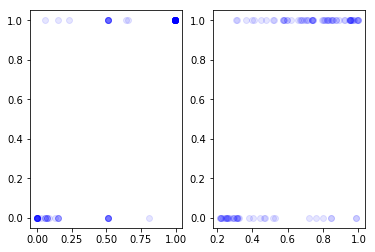

In [18]:
plt.subplot(1,2,1)
plt.plot(y_hat_trans,y_test,'bo',alpha=0.1)
plt.subplot(1,2,2)
plt.plot(y_hat_origin,y_test,'bo',alpha=0.1)
plt.show()

ks_value is 0.8301 at pop = 0.55


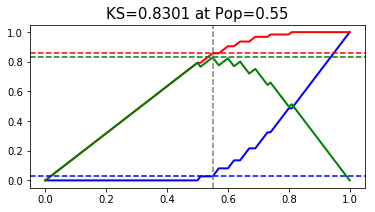

,tile,cumsum_good,cumsum_bad,ks
0,0.00,0.000000,0.000000,0.000000
1,0.02,0.000000,0.031746,0.031746
2,0.03,0.000000,0.047619,0.047619
3,0.04,0.000000,0.063492,0.063492
4,0.05,0.000000,0.079365,0.079365
5,0.06,0.000000,0.095238,0.095238
6,0.07,0.000000,0.111111,0.111111
7,0.08,0.000000,0.126984,0.126984
8,0.09,0.000000,0.142857,0.142857
9,0.10,0.000000,0.158730,0.158730


In [32]:
MonoLogitTrans.PlotKS(y_hat_trans,y_test)

ks_value is 0.668 at pop = 0.61


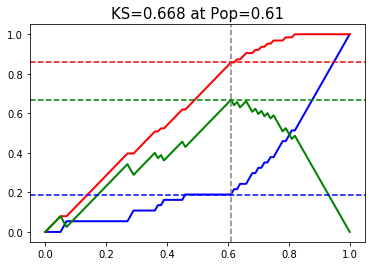

,tile,cumsum_good,cumsum_bad,ks
0,0.00,0.000000,0.000000,0.000000
1,0.02,0.000000,0.031746,0.031746
2,0.03,0.000000,0.047619,0.047619
3,0.04,0.000000,0.063492,0.063492
4,0.05,0.000000,0.079365,0.079365
5,0.06,0.027027,0.079365,0.052338
6,0.07,0.054054,0.079365,0.025311
7,0.08,0.054054,0.095238,0.041184
8,0.09,0.054054,0.111111,0.057057
9,0.10,0.054054,0.126984,0.072930


In [20]:
MonoLogitTrans.PlotKS(y_hat_origin,y_test)

## Demonstrate the choice of start point of LinearModel

In [21]:
model1 = LinearModel.LassoClassifierCV(beta_mean=True,start_point='ridge')
model1.fit(X_origin,y_test)
model2 = LinearModel.LassoClassifierCV(beta_mean=True,start_point=None)
model2.fit(X_origin,y_test)
y_hat_1 = model1.predict_proba(X_origin)
y_hat_2 = model2.predict_proba(X_origin)

CV loop No.0 for lambda=0.1
2019-08/12/19 15:54:47	40	4.817591
2019-08/12/19 15:54:47	60	4.8132
2019-08/12/19 15:54:47	80	4.762322
2019-08/12/19 15:54:47	100	4.766135
CV loop No.1 for lambda=0.1
2019-08/12/19 15:54:47	40	4.916989
2019-08/12/19 15:54:47	60	4.7829328
2019-08/12/19 15:54:47	80	4.8085346
2019-08/12/19 15:54:48	100	4.7818537
CV loop No.0 for lambda=0.01
CV loop No.1 for lambda=0.01
2019-08/12/19 15:54:48	40	4.865055
2019-08/12/19 15:54:48	60	4.6531153
2019-08/12/19 15:54:49	80	4.6907177
2019-08/12/19 15:54:49	100	4.6411347
CV loop No.0 for lambda=0.001
2019-08/12/19 15:54:49	40	4.6593766
2019-08/12/19 15:54:49	60	4.6287985
CV loop No.1 for lambda=0.001
2019-08/12/19 15:54:49	40	4.69752
2019-08/12/19 15:54:50	60	4.6624427
2019-08/12/19 15:54:50	80	4.65105
2019-08/12/19 15:54:50	100	4.63335
CV loop No.0 for lambda=0.0001
2019-08/12/19 15:54:50	40	4.652087
2019-08/12/19 15:54:50	60	4.747896
2019-08/12/19 15:54:50	80	4.6212287
2019-08/12/19 15:54:50	100	4.6106334
CV loop No.1 f

#### Ridge estimator as the start point

In [22]:
roc_auc_score(y_test,y_hat_1)

0.8554268554268554

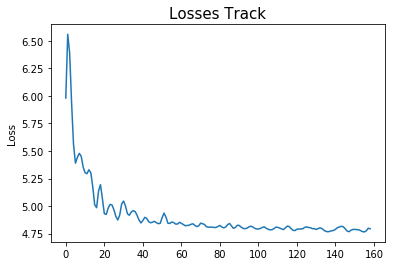

In [23]:
model1.plotLoss()

#### Random normal as the start point

In [24]:
roc_auc_score(y_test,y_hat_2)

0.8627198627198627

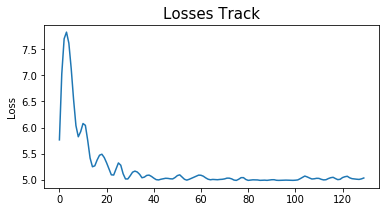

In [25]:
model2.plotLoss()

## Demonstrate the choice of Q0 and Q1 of LinearModel

In [26]:
model1 = LinearModel.LassoClassifierCV(beta_mean=True,Q0=0.95,Q1=0.95,max_iter=300)
model1.fit(X_origin,y_test)
model2 = LinearModel.LassoClassifierCV(beta_mean=True,Q0=1,Q1=1)
model2.fit(X_origin,y_test)
y_hat_1 = model1.predict_proba(X_origin)
y_hat_2 = model2.predict_proba(X_origin)

CV loop No.0 for lambda=0.1
2019-08/12/19 15:55:01	40	5.5042973
2019-08/12/19 15:55:01	60	6.020365
2019-08/12/19 15:55:01	80	5.8516164
2019-08/12/19 15:55:01	100	5.3033714
2019-08/12/19 15:55:01	120	5.509884
2019-08/12/19 15:55:01	140	4.9082527
2019-08/12/19 15:55:01	160	5.4965587
2019-08/12/19 15:55:01	180	5.3344216
2019-08/12/19 15:55:01	200	5.4167137
CV loop No.1 for lambda=0.1
2019-08/12/19 15:55:02	40	5.6396437
2019-08/12/19 15:55:02	60	5.214391
2019-08/12/19 15:55:02	80	5.674684
CV loop No.0 for lambda=0.01
2019-08/12/19 15:55:02	40	6.1623497
2019-08/12/19 15:55:02	60	4.979495
2019-08/12/19 15:55:02	80	5.611781
2019-08/12/19 15:55:03	100	5.19948
2019-08/12/19 15:55:03	120	5.2795053
2019-08/12/19 15:55:03	140	5.604964
2019-08/12/19 15:55:03	160	5.303938
2019-08/12/19 15:55:03	180	5.5578346
CV loop No.1 for lambda=0.01
2019-08/12/19 15:55:03	40	5.4197936
2019-08/12/19 15:55:03	60	4.984164
2019-08/12/19 15:55:04	80	5.60655
2019-08/12/19 15:55:04	100	4.755801
2019-08/12/19 15:55:04	1

#### Q0 and Q1 less than 1

which means the largest (1-Q0)*100% elements with label Y=0 and (1-Q1)*100% elements with label Y=1, before taking the mean

In [27]:
roc_auc_score(y_test,y_hat_1)

0.8717288717288717

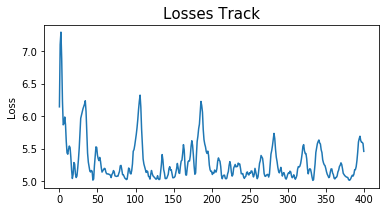

In [28]:
model1.plotLoss()

#### Q0 and Q1 equal to 1

In [29]:
roc_auc_score(y_test,y_hat_2)

0.8524238524238523

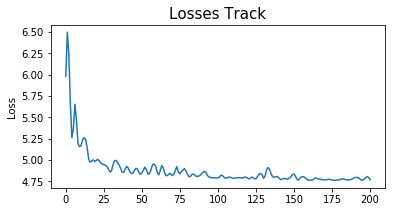

In [30]:
model2.plotLoss()